# Naive Bayes Classifier

# Objective:
To filter mobile phone spam using the Naive Bayes algorithm

# Dataset: sms_spam.csv
https://github.com/stedy/Machine-Learning-with-R-datasets

# 1. Load necessary libraries

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import DictVectorizer

# 2. Load data

In [115]:
df = pd.read_csv('spamsms.csv',names=['Label', 'Text'], encoding='ISO-8859-1')

# 3. Exploring and preparing the data 

In [83]:
df.columns = [''] * len(df.columns)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
new_header

                                                  ham
    Go until jurong point, crazy.. Available only ...
Name: 1, dtype: object

'Label'

In [116]:
df = df.iloc[1:]
df.head()

,Label,Text
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
df.shape

(5573, 2)

In [106]:
df.isnull().sum() # If there are any null values in data set

Label    0
Text     0
dtype: int64

In [107]:
df.describe(include= 'all')

,Label,Text
count,5573,5573
unique,3,5170
top,ham,"Sorry, I'll call later"
freq,4825,30


## a) Find the distribution of target variable (Class) 


In [108]:
df[df['Label']=='ham'].shape

(4825, 2)

In [109]:
df[df['Label']=='spam'].shape

(747, 2)

## b) Plot the distribution of target variable using histogram

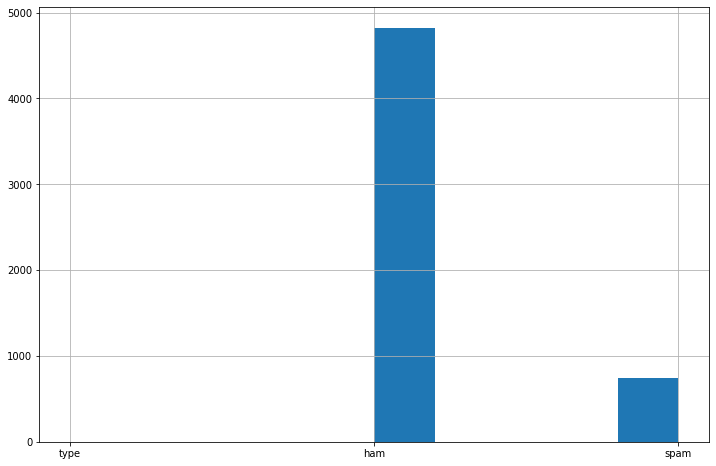

In [110]:
df['Label'].hist( figsize=(12,8)); 

## c) Summary Statistics and explain insights for at least 2 variables

In [111]:
hams = df[df["Label"] == "ham"].count()[0]
spams = df[df["Label"] == "spam"].count()[0]
total_values = df.count()[0]
print("Number of spam cases: {0} ({1:2.2f}%)".format(spams, (spams / total_values) * 100 ))
print("Number of ham cases: {0} ({1:2.2f}%)".format(hams, (hams /total_values ) * 100))

Number of spam cases: 747 (13.40%)
Number of ham cases: 4825 (86.58%)


# 4. Create training and test datasets

In [125]:
cols=df.columns
X = df['Text']    # Predictor feature columns (8 X m)
Y = df['Label']   # Predicted class (1=True, 0=False) (1 X m)
X.columns = cols[1]
Y.column = cols[0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number


# 5. Prepare the data by splitting the text documents into words and also create indicator feature for frequent words


Here, as this the dataset which requires some Text Analytics. This might not yet come into your notice, hence giving the 
solution for the reference. This may be helpful in the future concepts.

We want to find the frequencies of words in the spam and non-spam messages. The words of the messages will be model features.

In [127]:
#Data preparation – splitting text documents into words
def text_process (x):
    return x.split()
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Text'])
print(len(bow_transformer.vocabulary_))

15585


In [128]:
#Data preparation – creating indicator features for frequent words
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(3900, 15585)


# 6. Create indicator features for frequent words

In [129]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(3900, 15585)


# 7. Train a model on the data

In [130]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, y_train)

# 8. Evaluate model performance

In [131]:
messages_bow = bow_transformer.transform(x_test)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1672, 15585)


In [132]:
y_pred = spam_detect_model.predict(messages_tfidf)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [134]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))

confusion_matrix
[[1454    0]
 [ 103  115]]


# 9. Measure performance for classifcation

In [135]:
df_table = confusion_matrix(y_test,y_pred)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.94
precision:  1.0
recall   :  0.53
F1 score :  0.69
